In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import sys

In [4]:
sys.path.append('..')

In [178]:
import os
from os import path as osp
import cv2
import numpy
import torch
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.patheffects as path_effects
from PIL import Image
import scipy
import numpy as np

from rubi.datasets.extract_detectron import build_vocab
from rubi.datasets.extract_detectron import build_model
from rubi.datasets.extract_detectron import get_detectron_features
from rubi.datasets.extract_detectron import image_transform
from rubi.datasets.extract_detectron import process_feature_extraction
from maskrcnn_benchmark.structures.image_list import to_image_list

In [179]:
image_path = '/private/home/rcadene/data/rubi.bootstrap.pytorch/vqa/coco/raw/test2015/COCO_test2015_000000000063.jpg'

dir_data = '../data'
dir_dpythia = osp.join(dir_data, 'pythia')
path_ckpt = osp.join(dir_dpythia, 'detectron_model.pth')
path_yaml = osp.join(dir_dpythia, 'detectron_model.yaml')
path_vocab = osp.join(dir_dpythia, 'visual_genome_categories.json')

if not osp.isfile(path_ckpt) or not osp.isfile(path_ckpt):
    os.system(f'mkdir -p {dir_dpythia}')
    os.system(f'wget -O {path_ckpt} https://dl.fbaipublicfiles.com/pythia/detectron_model/detectron_model.pth')
    os.system(f'wget -O {path_yaml} https://dl.fbaipublicfiles.com/pythia/detectron_model/detectron_model.yaml')

cname_to_cid, cid_to_cname = build_vocab(path_vocab)
detectron_model = build_model(path_yaml, path_ckpt)

In [243]:
im_tensor, im_info, im = image_transform(image_path)
im_tensor, im_infos = [im_tensor], [im_info]
current_img_list = to_image_list(im_tensor, size_divisible=32)
current_img_list = current_img_list.to('cuda')
with torch.no_grad():
    output = detectron_model(current_img_list)
output = process_feature_extraction(output, im_infos)

In [88]:
im_shape = im.shape
im_size_min = np.min(im_shape[0:2])
im_size_max = np.max(im_shape[0:2])
im_scale = float(800) / float(im_size_min)
# Prevent the biggest axis from being more than max_size
if np.round(im_scale * im_size_max) > 1333:
    im_scale = float(1333) / float(im_size_max)
im_resize = cv2.resize(
    im,
    None,
    None,
    fx=im_scale,
    fy=im_scale,
    interpolation=cv2.INTER_LINEAR
)

In [182]:
cname_to_cid

{'__background__': 0,
 'yolk': 1,
 'goal': 2,
 'bathroom': 3,
 'macaroni': 4,
 'umpire': 5,
 'toothpick': 6,
 'alarm clock': 7,
 'ceiling fan': 8,
 'photos': 9,
 'parrot': 10,
 'tail fin': 11,
 'birthday cake': 12,
 'calculator': 13,
 'catcher': 14,
 'toilet': 15,
 'batter': 16,
 'stop sign': 17,
 'cone': 18,
 'microwave': 19,
 'skateboard ramp': 20,
 'tea': 21,
 'dugout': 22,
 'products': 23,
 'halter': 24,
 'kettle': 25,
 'kitchen': 26,
 'refrigerator': 27,
 'ostrich': 28,
 'bathtub': 29,
 'blinds': 30,
 'court': 31,
 'urinal': 32,
 'knee pads': 33,
 'bed': 34,
 'flamingo': 35,
 'giraffe': 36,
 'helmet': 37,
 'giraffes': 38,
 'tennis court': 39,
 'motorcycle': 40,
 'laptop': 41,
 'tea pot': 42,
 'horse': 43,
 'television': 44,
 'shorts': 45,
 'manhole': 46,
 'dishwasher': 47,
 'jeans': 48,
 'sail': 49,
 'monitor': 50,
 'man': 51,
 'shirt': 52,
 'car': 53,
 'cat': 54,
 'garage door': 55,
 'bus': 56,
 'radiator': 57,
 'tights': 58,
 'sailboat': 59,
 'racket': 60,
 'plate': 61,
 'rock w

In [126]:
output[2]['scores'].shape

torch.Size([100, 1601])

In [106]:
output[0].keys()

dict_keys(['fc6', 'fc7', 'proposals', 'pooled', 'scores', 'bbox_deltas'])

In [133]:
output[2]['proposals'][0]

BoxList(num_boxes=100, image_width=1088, image_height=800, mode=xyxy)

In [109]:
output[0]['fc6'].shape

torch.Size([1000, 2048])

In [110]:
output[0]['scores'].shape

torch.Size([1000, 1601])

In [104]:
detectron_model.roi_heads.box.post_processor

PostProcessor()

In [102]:
detectron_model.roi_heads.cfg.MODEL.MASK_ON

False

In [101]:
detectron_model.training

False

In [82]:
output[0]['proposals']

[BoxList(num_boxes=1000, image_width=1088, image_height=800, mode=xyxy)]

In [97]:
output[0]['bbox_deltas'].shape

torch.Size([1000, 6404])

In [95]:
output[0]['scores'].shape

torch.Size([1000, 1601])

In [83]:
output[1]

[BoxList(num_boxes=100, image_width=1088, image_height=800, mode=xyxy)]

In [60]:
boxlist=output[1][0]

In [62]:
boxlist.bbox[0]

tensor([288.3925, 555.9901, 326.9180, 610.0804], device='cuda:0')

In [76]:
im.shape

(480, 640, 3)

In [67]:
bboxes = numpy.zeros(im.shape)

In [235]:
output[2]['proposals'][0].bbox.shape[0]

100

In [250]:
output[2]['image_width']

[640]

In [249]:
output[2]['proposals'][0][i]

tensor([313.4013, 129.0779, 415.8551, 353.2818], device='cuda:0')

In [248]:
output[2]['proposals_resized'][0][i]

tensor([522.3355, 215.1299, 693.0917, 588.8029], device='cuda:0')

In [247]:
output[2]['proposals_normalized'][0][i]

tensor([0.4897, 0.2689, 0.6498, 0.7360], device='cuda:0')

In [242]:
im_resize.shape

(800, 1067, 3)

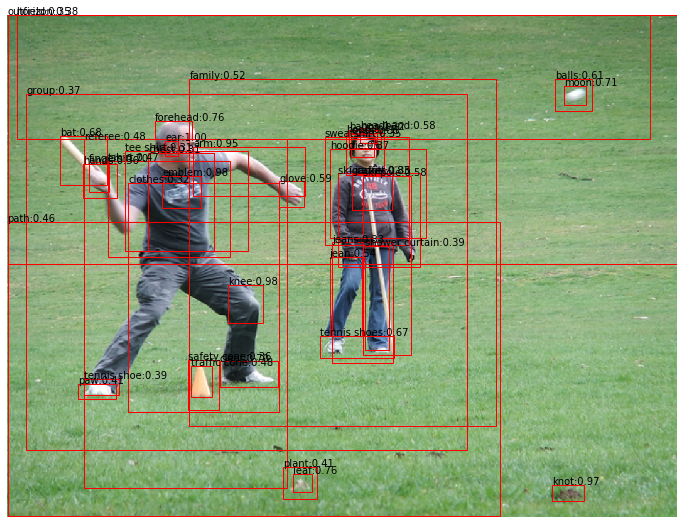

In [246]:
fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(im_resize)
#ax.imshow(img_mask, alpha=0.6, cmap=cmap)

for i in range(output[2]['proposals_resized'][0].shape[0]):
    
    x = output[2]['proposals_resized'][0][i][0].item()
    y = output[2]['proposals_resized'][0][i][1].item()
    w = output[2]['proposals_resized'][0][i][2].item() - x
    h = output[2]['proposals_resized'][0][i][3].item() - y
    #print(x,y,w,h)
    

    #rect = patches.Rectangle((555,288),20,20,linewidth=1,edgecolor='r',facecolor='none')
    #ax.add_patch(rect)
    
    #scores = torch.softmax(output[2]['scores'][i], dim=0)[1:]
    #print(scores)
    #sorted_ids = [idx.item() for idx in scores.argsort(descending=True)]
    
    #sorted_ids = torch.softmax(output[2]['scores'][i].argsort(descending=True)
    
    #for idx in sorted_ids:
    best_score = output[2]['best_scores'][0][i]
    best_class_id = output[2]['best_class_ids'][0][i]
    cname = cid_to_cname[best_class_id]
    #score = scores[sorted_ids[0]].item()
#     if cname == '__background__':
#        continue
    if best_score < 0.3:
       continue
    ax.text(x,y, '{}:{:.2f}'.format(cname,best_score))
    rect = patches.Rectangle((x,y),w,h,linewidth=1,edgecolor='r',facecolor='none',label='lol')
    ax.add_patch(rect)
    #print(cid_to_cname[idx], scores[idx].item())
    #print(torch.sigmoid(output[2]['scores'][i])[51])
    #print(cid_to_cname[51])
    #break

ax.set_axis_off()
plt.show()


In [28]:
output

({'fc6': tensor([[0.0000, 0.0000, 0.0966,  ..., 0.0000, 0.0000, 0.0000],
          [1.6053, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [2.4473, 0.0000, 1.5384,  ..., 0.0000, 5.1734, 0.0000],
          [1.4873, 5.7710, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 2.6762, 0.9826]],
         device='cuda:0'),
  'fc7': tensor([[0.0000, 0.0936, 2.5807,  ..., 0.2180, 1.5035, 0.0000],
          [1.1239, 0.2301, 4.0726,  ..., 0.8866, 0.0000, 0.0000],
          [0.0000, 0.4093, 1.3539,  ..., 0.5662, 2.6795, 0.7591],
          ...,
          [0.0000, 0.0000, 1.8048,  ..., 0.0000, 3.2673, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [3.5783, 0.0000, 0.2240,  ..., 1.2526, 0.0000, 0.0000]],
         device='cuda:0'),
  'proposals': [BoxList(num_boxes=1000, image_width=1088, image_height=800, mode=xyxy)],
  'pooled': tensor(

In [ ]:
detectron_features = get_detectron_features(detectron_model, image_path)